In [2]:
import sys, os
sys.path.append('/home/akinshol/Data/Quenching/')
from bulk import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mpl
import pynbody
import pickle

#mpl.rcParams['font.monospace'] = 'Terminal'
mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams.update({'font.size': 9})


h148 = '/home/akinshol/Data/Sims/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096'
h229 = '/home/akinshol/Data/Sims/h229.cosmo50PLK.3072gst5HbwK1BH/h229.cosmo50PLK.3072gst5HbwK1BH.004096/h229.cosmo50PLK.3072gst5HbwK1BH.004096'
h242 = '/home/akinshol/Data/Sims/h242.cosmo50PLK.3072gst5HbwK1BH/h242.cosmo50PLK.3072gst5HbwK1BH.004096/h242.cosmo50PLK.3072gst5HbwK1BH.004096'
h329 = '/home/akinshol/Data/Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096'
cptmarvel = '/home/akinshol/Data/Sims/cptmarvel.cosmo25cmb.4096g5HbwK1BH/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096.dir/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096'
elektra = '/home/akinshol/Data/Sims/elektra.cosmo25cmb.4096g5HbwK1BH/elektra.cosmo25cmb.4096g5HbwK1BH.004096.dir/elektra.cosmo25cmb.4096g5HbwK1BH.004096'
rogue = '/home/akinshol/Data/Sims/rogue.cosmo25cmb.4096g5HbwK1BH/rogue.cosmo25cmb.4096g5HbwK1BH.004096.dir/rogue.cosmo25cmb.4096g5HbwK1BH.004096'
storm = '/home/akinshol/Data/Sims/storm.cosmo25cmb.4096g5HbwK1BH/storm.cosmo25cmb.4096g5HbwK1BH.004096/storm.cosmo25cmb.4096g5HbwK1BH.004096'

In [5]:
pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue,
                                          pynbody.halo.hop.HOPCatalogue]

# some quenching time stuff that i didn't know where to put

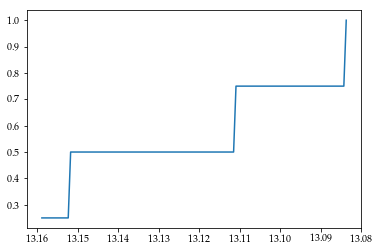

13.083750972865637


In [16]:
data = read_file(h148,'h148')

i=45

sfh = data['sfh'].tolist()[i]
bins = data['sfhbins'].tolist()[i]

### quenching time 
sfhmstar = np.sum(sfh)
# create cumulative sfh 
bincenters = 0.5*(bins[1:]+bins[:-1])
c_sfh = np.empty(shape=sfh.shape)
for i in range(len(bincenters)):
    c_sfh[i] = np.sum(sfh[:i+1])/sfhmstar


    
time = np.min(bincenters[c_sfh > 0.9])

age = 13.800797497330507
tquench = age - time

plt.plot(age - bincenters,c_sfh)
plt.gca().invert_xaxis()
plt.show()

print(tquench)

In [74]:
oddities = data[(tquench>10) & (~q)]
haloids = oddities['haloid']
sims = oddities['sim']
ssfr = oddities['sSFR']
HIgasfrac = oddities['HIgasfrac']

for i in range(len(haloids)):
    print(f'Halo {haloids.tolist()[i]}, simulation {sims.tolist()[i]}, with sSFR {ssfr.tolist()[i]} and HI gas frac {HIgasfrac.tolist()[i]}')

Halo 39, simulation h242, with sSFR 1.176400861945524e-09 and HI gas frac 13.611768166989757
Halo 14, simulation storm, with sSFR 2.2759524892326014e-11 and HI gas frac 1.4576598065774489


In [6]:
s = pynbody.load(h242)
h = s.halos()
h[5].properties

{'omegaM0': 0.3086,
 'omegaL0': 0.6914,
 'h': 0.6776942783267969,
 'boxsize': Unit("5.00e+04 kpc a"),
 'a': 0.9999999999527689,
 'time': Unit("1.41e+01 s kpc km**-1"),
 'halo_id': 5,
 '#ID': 4,
 'hostHalo': -1,
 'numSubStruct': 43,
 'mass': 3491360000000.0,
 'npart': 620277,
 'Xc': 18101.77902108,
 'Yc': 20551.53915869,
 'Zc': 20329.62077864,
 'VXc': -101.28,
 'VYc': 134.08,
 'VZc': -5.05,
 'Rvir': 307.86,
 'Rmax': 65.18,
 'r2': 14.0347,
 'mbp_offset': 9.37281,
 'com_offset': 9.64525,
 'Vmax': 278.47,
 'v_esc': 312.649993,
 'sigV': 266.76,
 'lambda': 0.060266,
 'lambdaE': 0.067959,
 'Lx': -0.5405,
 'Ly': 0.5847,
 'Lz': 0.605,
 'b_axis': 0.944037,
 'c_axis': 0.83918,
 'Eax': 0.259943,
 'Eay': -0.4364,
 'Eaz': 0.861385,
 'Ebx': 0.857094,
 'Eby': 0.515155,
 'Ebz': 0.002342,
 'Ecx': -0.444769,
 'Ecy': 0.737679,
 'Ecz': 0.507947,
 'ovdens': 333.52,
 'nbins': 32,
 'fMhires': 0.0,
 'Ekin': 1.24223e+17,
 'Epot': -2.32488e+17,
 'SurfP': -9780220000000000.0,
 'Phi0': 328538,
 'cNFW': 12.1772,
 '

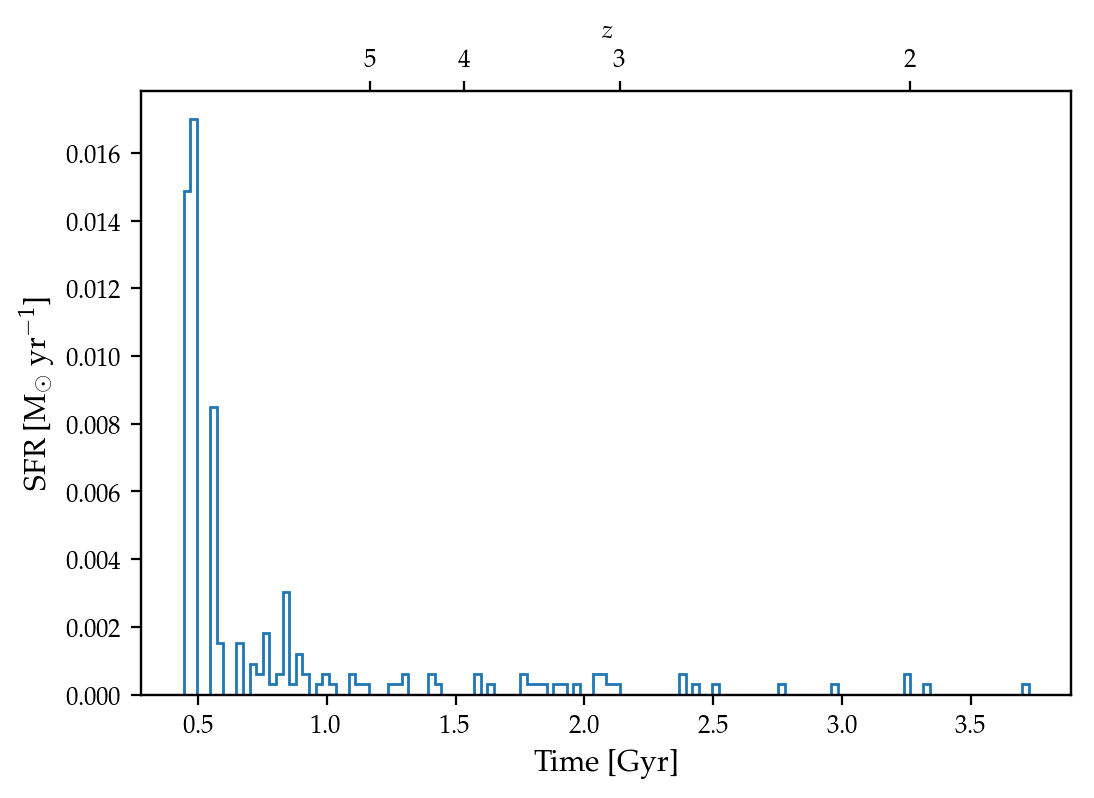

In [72]:
plt.figure(dpi=200)
sfh, bins = pynbody.plot.stars.sfh(halo, filename=None, massform=True, clear=False, 
                                   legend=False, subplot=False, trange=False, bins=128)
plt.show()

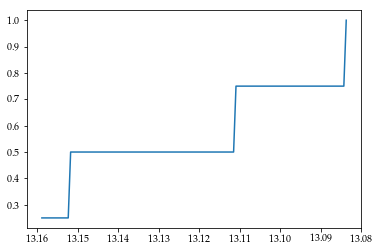

13.083750972865637


In [16]:
data = read_file(h148,'h148')

i=45

sfh = data['sfh'].tolist()[i]
bins = data['sfhbins'].tolist()[i]

### quenching time 
sfhmstar = np.sum(sfh)
# create cumulative sfh 
bincenters = 0.5*(bins[1:]+bins[:-1])
c_sfh = np.empty(shape=sfh.shape)
for i in range(len(bincenters)):
    c_sfh[i] = np.sum(sfh[:i+1])/sfhmstar


    
time = np.min(bincenters[c_sfh > 0.9])

age = 13.800797497330507
tquench = age - time

plt.plot(age - bincenters,c_sfh)
plt.gca().invert_xaxis()
plt.show()

print(tquench)

In [ ]:
path71 = '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.000071/h329.cosmo50PLK.3072gst5HbwK1BH.000071'
path96 = '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.000096/h329.cosmo50PLK.3072gst5HbwK1BH.000096'
s71 = pynbody.load(path71)
s96 = pynbody.load(path96)


In [ ]:
import tangos

In [ ]:
tangos.all_simulations()

In [ ]:
import pickle
h329 = '/home/akinshol/Data/Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096'
simpath = h329

data = []
with open(simpath + '.data', 'rb') as f:
    while True:
        try:
            data.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
            
            
#

In [1]:
import pynbody

In [2]:
import os
path = '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/'
filenames = os.listdir(path)
filenames = [f for f in filenames if len(f)==38]
filenames = [path+filename for filename in filenames]


In [3]:
filenames

['/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000139',
 '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.001824',
 '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.003168',
 '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.002976',
 '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.002400',
 '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.001632',
 '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.003195',
 '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.307

In [12]:
import numpy as np
np.sort(filenames)

array(['/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000071',
       '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000096',
       '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000107',
       '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000139',
       '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000188',
       '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000192',
       '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000225',
       '/home/christenc/Dat

In [5]:
import pynbody
import numpy as np 
pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue,
                                          pynbody.halo.hop.HOPCatalogue]

In [2]:
import os
path = '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/'
filenames = os.listdir(path)
filenames = [f for f in filenames if len(f)==38]
filenames = [path+filename for filename in filenames]


In [14]:
for filename in np.sort(filenames):
    s = pynbody.load(filename)
    h = s.halos()
    try:
        l = len(h[len(h)].dm)
        print(filename[-38:])
    except AttributeError as err:
        pass

h329.cosmo50PLK.3072gst5HbwK1BH.000384
h329.cosmo50PLK.3072gst5HbwK1BH.004096


In [6]:
s = pynbody.load(np.sort(filenames)[-2])
h = s.halos()

In [7]:
len(h)

7188

In [30]:
import pynbody
pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue,
                                          pynbody.halo.hop.HOPCatalogue]
path = '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.004096'

s = pynbody.load(path)
h = s.halos()

In [31]:
hd = s.halos(dummy=True)

In [35]:
NDM = []
pynids = []
for halo in hd:
    N = halo.properties['npart'] - halo.properties['n_star'] - halo.properties['n_gas']
    NDM.append(N)
    pynids.append(halo.properties['#ID']+1)

8539
601
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 2

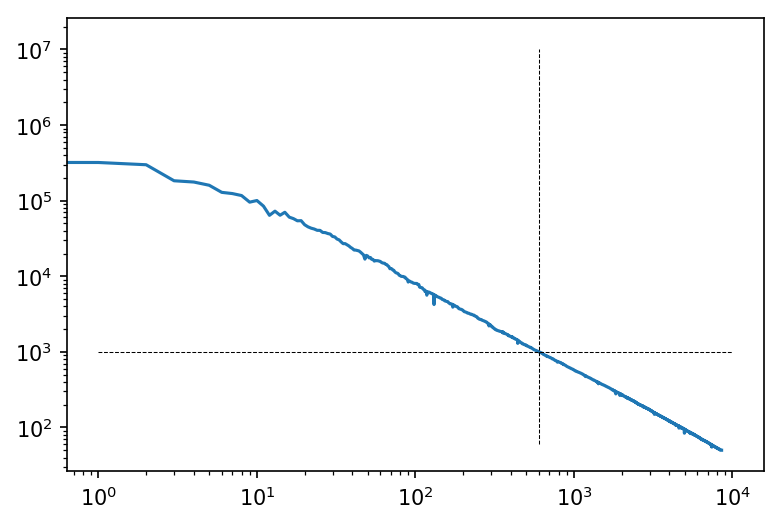

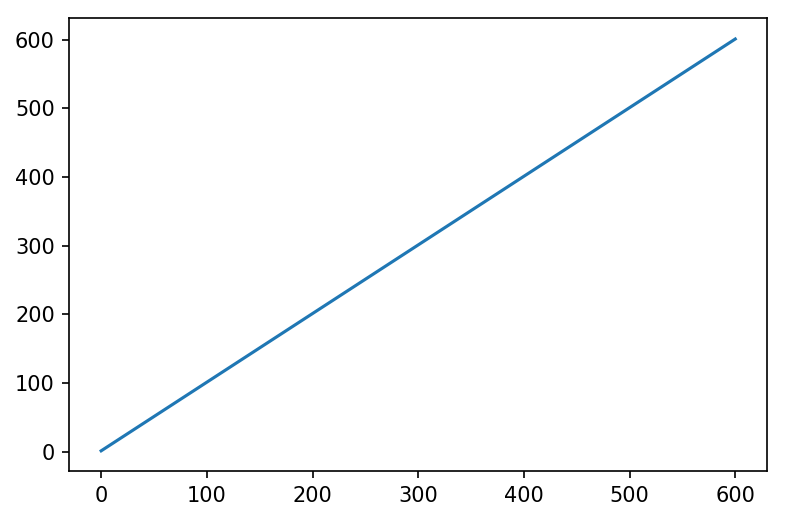

In [47]:
NDM = np.array(NDM)
pynids = np.array(pynids)
print(len(hd))
print(len(NDM[NDM>1000])) # expect 601
print(pynids[NDM>1000])

import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.plot(range(len(NDM)),NDM)
plt.loglog()
plt.plot([1,1e4],[1e3,1e3],'k--',linewidth=0.5)
plt.plot([601,601],[6e1,1e7],'k--',linewidth=0.5)
plt.show()

plt.figure(dpi=150)
plt.plot(range(len(NDM[NDM>1000])),pynids[NDM>1000])
plt.show()

In [35]:
data = read_file('/home/a')

In [20]:
halo = h.load_copy(1)

In [21]:
halo.physical_units()

13.799921519196968

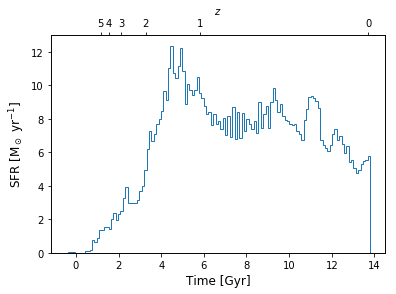

In [25]:
sfh, bins = pynbody.plot.stars.sfh(halo, filename=None, massform=False, clear=False, 
                                   legend=False, subplot=False, trange=False, bins=128)



In [29]:
import numpy as np
print(np.sum(halo.s['mass']))
print(bins[-1],sfh[-1]/np.sum(halo.s['mass']))

89917844937.60605
13.799921519196968 6.44735566576925e-11


In [17]:
print(nums)

[1, 4, 10, 21, 27, 31, 35, 37, 45, 47, 48, 49, 67, 71, 81, 102, 131, 407, 418, 1534, 2551, 8678, 9724, 11563]


In [58]:
path = '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/'

sims = ['h329.cosmo50PLK.3072gst5HbwK1BH.000071','h329.cosmo50PLK.3072gst5HbwK1BH.004096']
s1 = pynbody.load(path+sims[0])
s2 = pynbody.load(path+sims[1])

h1 = s1.halos()
h2 = s2.halos()

In [46]:
b = pynbody.bridge.OrderBridge(s1,s2)

In [47]:
cat = b.match_catalog()

ValueError: cannot reshape array of size 126 into shape (64,2)

In [45]:
type(h1[len(h1)])

pynbody.halo.DummyHalo

In [78]:
h2.get_group_array(family='dm')

array([2591,  664,  664, ...,   -1,  664,   -1], dtype=int32)

In [62]:
h1_1 = h2.load_copy(1)
h1_1.physical_units()

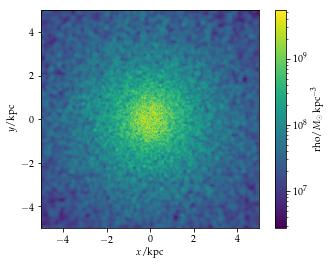

In [63]:
pynbody.analysis.angmom.faceon(h1_1)
pynbody.plot.sph.image(h1_1.dm, width='10 kpc')
plt.show()

In [27]:
path = '/home/akinshol/h329tests/noahffiles/h329.cosmo50PLK.3072gst5HbwK1BH.000096'
z1 = '.z15.933.AHF_particles'
z2 = '.z12.940.AHF_particles'
z3 = '.z11.991.AHF_particles'
z4 = '.z0.000.AHF_particles'

s = pynbody.load(path)
h = s.halos()
len(h)

RuntimeError: No halo catalogue found for '<SimSnap "/home/akinshol/h329tests/noahffiles/h329.cosmo50PLK.3072gst5HbwK1BH.000071" len=40809991>'

In [24]:
i = 2

halo = h[i]

print(f"fstart: {halo.properties['fstart']}")

fstart: 25183


In [25]:
from pynbody import util

f = util.open_(path+z1)

f.seek(halo.properties['fstart'],0)

25183

In [26]:
nparts = halo.properties['npart']
print(nparts)

data = (np.fromfile(f, dtype=int, sep=" ", count=nparts * 2).reshape(nparts,2))[:,0]
print(np.ascontiguousarray(data))

1500
[15979769 15982729 15990283 ... 16008265 15983455     1073]


In [304]:
from pynbody import util

f = util.open_(path+z4)
if not i==1:
    f.seek(halo.properties['fstart']-11,0)
else:
    f.seek(halo.properties['fstart'],0)

# print(f.read(100))

In [305]:
nparts = halo.properties['npart']
print(nparts)

data = (np.fromfile(f, dtype=int, sep=" ", count=nparts * 2).reshape(nparts,2))[:,0]
print(np.ascontiguousarray(data))

64
[32432356 32432523 32432465 32432453 32432358 32432466 32432524 32432494
 32432482 32432439 32432471 32432689 32432411 32432525 32432416 32432415
 32432359 32432745 32432454 32432526 32432509 32432521 32432355 32432468
 32432527 32432580 32432510 32432495 32432432 32432537 32432493 32432529
 32432690 32432470 32432413 32432501 32432467 32432522 32432528 32432438
 32432440 32432582 32432496 32432635 32432579 32432639 32432469 32432636
 32432577 32432633 32432414 32432458 32432412 32432572 32432455 32432570
 32444732 32432352 32432503 32432423 32432578 32432581 32432446 32432419]


In [8]:
integer = 1 

In [9]:
integer.name

AttributeError: 'int' object has no attribute 'name'